# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [8]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

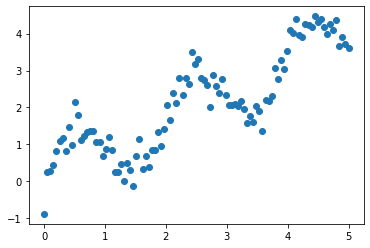

In [9]:
plt.scatter(x,y)

#### nonlinear

In [13]:
regr_lin = LinearRegression()

In [14]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [15]:
regr_lin.fit(X,y)

LinearRegression()

0.49174614131863187


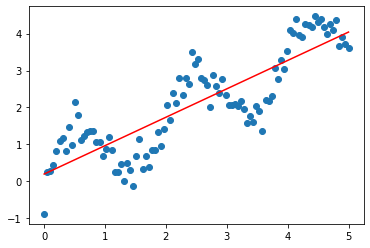

In [16]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [17]:
print(x.shape)

(100,)


In [18]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [19]:
regr_poly = LinearRegression()

In [20]:
regr_poly.fit(X_poly, y)

LinearRegression()

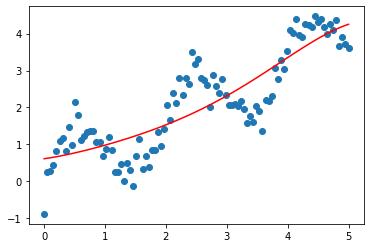

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [22]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 0.23450895  0.18985374 -0.08153715  0.02710972 -0.00289015]
interception:  0.6120390579472661


In [23]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.61203906, 0.62435689, 0.63758268, 0.6516596 , 0.66653486,
       0.68215953, 0.69848847, 0.71548018, 0.73309676, 0.7513037 ,
       0.77006982, 0.78936716, 0.80917086, 0.82945901, 0.85021259,
       0.87141533, 0.89305359, 0.91511625, 0.93759461, 0.96048226,
       0.98377499, 1.00747061, 1.03156895, 1.05607162, 1.080982  ,
       1.10630505, 1.13204725, 1.15821645, 1.18482179, 1.21187353,
       1.23938301, 1.26736248, 1.29582501, 1.32478436, 1.35425489,
       1.38425143, 1.41478915, 1.44588349, 1.47755001, 1.50980428,
       1.54266178, 1.57613778, 1.61024722, 1.64500461, 1.68042388,
       1.71651833, 1.75330046, 1.79078186, 1.82897314, 1.86788377,
       1.90752199, 1.94789467, 1.98900725, 2.03086355, 2.07346574,
       2.11681414, 2.16090718, 2.20574125, 2.25131057, 2.29760713,
       2.34462053, 2.39233786, 2.44074362, 2.48981961, 2.53954477,
       2.58989511, 2.64084356, 2.69235989, 2.74441059, 2.79695873,
       2.84996388, 2.90338196, 2.95716516, 3.01126181, 3.06561

In [27]:
print(regr_poly.predict(X_poly))
mse = np.sum((regr_poly.predict(X_poly)-y)**2) / len(y)
mse

[0.61203906 0.62435689 0.63758268 0.6516596  0.66653486 0.68215953
 0.69848847 0.71548018 0.73309676 0.7513037  0.77006982 0.78936716
 0.80917086 0.82945901 0.85021259 0.87141533 0.89305359 0.91511625
 0.93759461 0.96048226 0.98377499 1.00747061 1.03156895 1.05607162
 1.080982   1.10630505 1.13204725 1.15821645 1.18482179 1.21187353
 1.23938301 1.26736248 1.29582501 1.32478436 1.35425489 1.38425143
 1.41478915 1.44588349 1.47755001 1.50980428 1.54266178 1.57613778
 1.61024722 1.64500461 1.68042388 1.71651833 1.75330046 1.79078186
 1.82897314 1.86788377 1.90752199 1.94789467 1.98900725 2.03086355
 2.07346574 2.11681414 2.16090718 2.20574125 2.25131057 2.29760713
 2.34462053 2.39233786 2.44074362 2.48981961 2.53954477 2.58989511
 2.64084356 2.69235989 2.74441059 2.79695873 2.84996388 2.90338196
 2.95716516 3.01126181 3.06561626 3.12016878 3.17485544 3.229608
 3.28435379 3.33901558 3.3935115  3.44775492 3.50165431 3.55511314
 3.60802978 3.66029737 3.71180371 3.76243113 3.81205643 3.860550

0.45806881286123796

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [28]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [29]:
sigma = 0.3

In [30]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [31]:
regr_rbf = LinearRegression()

In [32]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

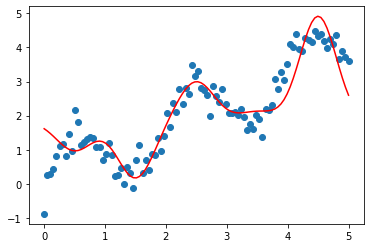

In [33]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [34]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.8566907  -1.66058281  1.17157191  0.28535023  3.08470577]
interception:  1.8307783515552616


#### Comparison

In [35]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

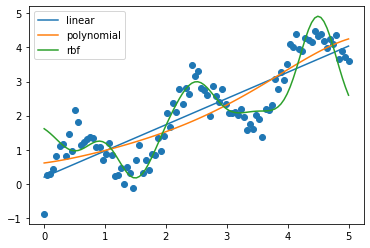

In [36]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [37]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.49174614131863187


In [38]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.45806881286123796


In [39]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.3060014367145955
